In [2]:
import pandas as pd
import numpy as np
from jupyter_utils import jupyter_setup, load_tracker
jupyter_setup()
import os
from evaluation_and_tracking import IDPerformanceTracker
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

C:\Michi\acoustic_covid_detection\python


In [3]:
# ID_PERFORMANCE_TRACKING = "003_find_confidently_misclassified.pickle"
ID_PERFORMANCE_TRACKING = "confident_misclassification_new.pickle"
id_performance = IDPerformanceTracker(ID_PERFORMANCE_TRACKING)
id_performance.df = id_performance.load()

In [4]:
id_performance.df.seed

0       99468865
1       99468865
2       99468865
3       99468865
4       99468865
          ...   
3014      215674
3015      215674
3016      215674
3017      215674
3018      215674
Name: seed, Length: 3019, dtype: object

In [5]:
id_performance.df.loss[0].mean()

2.832347319702283

In [6]:
len(id_performance.df.ID.unique())

768

In [7]:
id_performance.df["mean_loss"] = id_performance.df.loss.apply(lambda x: np.mean(x))

In [8]:
id_performance.df

,ID,label,loss,prediction,rec_type,seed,set_type,mean_loss
0,00xKcQMmcAhX8CODgBBLOe7Dm0T2,1.0,"[1.3466233015060425, 1.1572613716125488, 1.033...","[-1.0453599691390991, -0.7798793315887451, -0....",combined_vowels,99468865,eval,2.832347
1,0bcMNFt3dlPlUPTyCO8DVAlbTUC3,0.0,"[0.2767108380794525, 0.5676469206809998, 0.365...","[-1.1432387828826904, -0.26904216408729553, -0...",combined_vowels,99468865,eval,0.137669
2,0drfnqVwccT6UmgVLQEuyVglDC23,1.0,"[1.1334706544876099, 1.720908522605896, 1.8631...","[-0.7449893951416016, -1.5237938165664673, -1....",combined_vowels,99468865,eval,3.125969
3,0mGUoJiJnuhfNodzOrMwjcGftPD2,1.0,"[0.4326998293399811, 0.3024624288082123, 0.488...","[-0.055274516344070435, 0.4223545491695404, -0...",combined_vowels,99468865,eval,0.642542
4,1irqEfgfrbXwr2ymwtkMB1Y0rnB3,0.0,"[0.13241606950759888, 0.31561121344566345, 0.5...","[-1.9548678398132324, -0.9912916421890259, -0....",combined_vowels,99468865,eval,0.073215
...,...,...,...,...,...,...,...,...
3014,ZbFodPVPEZMK0DaH4J74kowt1d53,0.0,"[0.6249436736106873, 0.6132017970085144, 0.607...","[-0.141401469707489, -0.16684184968471527, -0....",combined_vowels,215674,eval,0.105514
3015,zLM432Aox7ZcmTXoglELTXNAVnf2,0.0,"[0.03743690624833107, 0.24059033393859863, 0.3...","[-3.2663209438323975, -1.301953911781311, -0.9...",combined_vowels,215674,eval,0.109803
3016,ZmJz4NgHHRZAwzUAVvkXBOmRSTA3,0.0,"[0.892867922782898, 0.4909782111644745, 0.8330...","[0.3661167323589325, -0.4558422863483429, 0.26...",combined_vowels,215674,eval,0.061285
3017,ZmTY0bYWVddyiiXVINDdmAIDhP13,0.0,"[0.43120986223220825, 0.8832540512084961, 1.13...","[-0.6178199052810669, 0.3497816026210785, 0.74...",combined_vowels,215674,eval,0.243466


In [18]:
temp = np.array(id_performance.df.mean_loss)

(0.0, 100.0)

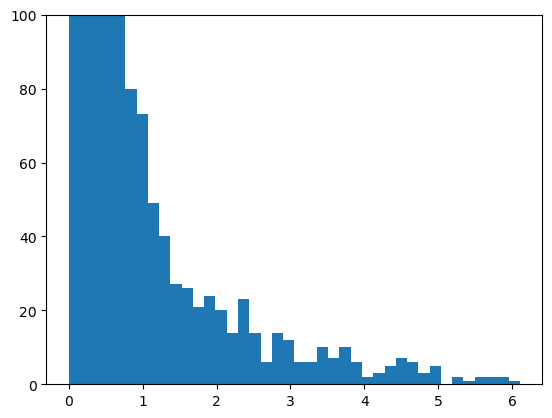

In [20]:
plt.hist(temp, 40)
plt.ylim([0, 100])

In [39]:
min_threshold = 1
mean_threshold = 1
confidently_misclassified = []
mean_mean_loss = []
for participant_id in id_performance.df.ID.unique():
    
    mean_loss = id_performance.df[id_performance.df.ID == participant_id]["mean_loss"].values
    
    # print(np.mean(mean_loss), np.max(mean_loss))
    if np.min(mean_loss) > min_threshold and np.mean(mean_loss) > mean_threshold:
        confidently_misclassified.append(participant_id)
        mean_mean_loss.append(np.mean(mean_loss))
        # print(np.mean(mean_loss))
        # print(id_performance.df[id_performance.df.ID == participant_id][["mean_loss", "rec_type"]])
len(confidently_misclassified)

53

In [35]:
# confidently_misclassified = id_performance.df[id_performance.df.ID == pd.DataFrame(confidently_misclassified)]
# confidently_misclassified

In [25]:
save_df = id_performance.df[["ID", "mean_loss"]]
save_df

,ID,mean_loss
0,00xKcQMmcAhX8CODgBBLOe7Dm0T2,2.832347
1,0bcMNFt3dlPlUPTyCO8DVAlbTUC3,0.137669
2,0drfnqVwccT6UmgVLQEuyVglDC23,3.125969
3,0mGUoJiJnuhfNodzOrMwjcGftPD2,0.642542
4,1irqEfgfrbXwr2ymwtkMB1Y0rnB3,0.073215
...,...,...
3014,ZbFodPVPEZMK0DaH4J74kowt1d53,0.105514
3015,zLM432Aox7ZcmTXoglELTXNAVnf2,0.109803
3016,ZmJz4NgHHRZAwzUAVvkXBOmRSTA3,0.061285
3017,ZmTY0bYWVddyiiXVINDdmAIDhP13,0.243466


In [ ]:
save_df.to_excel("data/Coswara_processed/id_performance_tracking/01_detected_confident_misclassifiactions.xlsx", index=False)

In [47]:
temp1 = pd.DataFrame(confidently_misclassified, columns=["ID"])
temp22 = pd.DataFrame(mean_mean_loss, columns=["mean_loss"])
save_df = pd.concat([save_df, save_df2], axis=1)

In [48]:
save_df.to_excel("data/Coswara_processed/id_performance_tracking/01_detected_confident_misclassifiactions_24082023.xlsx", index=False)

In [106]:
# save_df.to_excel("data/Coswara_processed/id_performance_tracking/01_detected_confident_misclassifiactions_temp.xlsx", index=False)

In [49]:
loaded_df = pd.read_excel("data/Coswara_processed/id_performance_tracking/01_detected_confident_misclassifiactions_24082023.xlsx")
loaded_df

,ID,mean_loss
0,00xKcQMmcAhX8CODgBBLOe7Dm0T2,4.075574
1,6kMlitGRc3XF2Nt13Wl3LOs4wMl1,4.659123
2,C1h80BY2J5eZgP3UMb4PTJXyKWy2,3.908538
3,iS29Ewab4XQHypUcZLygL7AYH6J2,3.880952
4,Qxsv89ELtlUniEBfEvmDldEdZBy2,2.540170
5,y6VWQQ5bW0drHBBQ74CmfwHniKo2,1.692200
6,zGjGkKCAjkdA9S3aSreocxkWf0C2,3.382579
7,ZIuG3ACI2aQ7spKg26hQM9nxFWi1,1.924396
8,ZzKpUtFGzsVEK7E1wsVGRftKdx93,2.911689
9,1PhqsVP6EhPzs1zx9XUsyj7nm823,3.469358


In [109]:
len(loaded_df[loaded_df.mean_loss > 3])

52